<a href="https://colab.research.google.com/github/smv1980/analysis-methods/blob/main/Kmeans_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Data from Kaggle**

Data set was updated to Kaggle by Zubair Mustafa.
The data is called: Shopping Mall Customer Segmentation Data

In [2]:
import kagglehub

In [3]:
# Download Last Version of https://www.kaggle.com/datasets/zubairmustafa/shopping-mall-customer-segmentation-data?resource=download
path = kagglehub.dataset_download("zubairmustafa/shopping-mall-customer-segmentation-data")

print("Path to dataset files:", path)

100%|██████████| 426k/426k [00:00<00:00, 66.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/zubairmustafa/shopping-mall-customer-segmentation-data/versions/1


# **Loading Data**

In [4]:
import pandas as pd
data = pd.read_csv('/root/.cache/kagglehub/datasets/zubairmustafa/shopping-mall-customer-segmentation-data/versions/1/Shopping Mall Customer Segmentation Data .csv')

# **Exploratory Analysis**

## **Null and Duplicated Data**

In [5]:
# Variables and Type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     15079 non-null  object
 1   Age             15079 non-null  int64 
 2   Gender          15079 non-null  object
 3   Annual Income   15079 non-null  int64 
 4   Spending Score  15079 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 589.2+ KB


In [6]:
# Five first registers
data.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [7]:
# Análisis preliminar
print(f'Total Registers (rows): {data.shape[0]}')
print(f'Total Variables (columns): {data.shape[1]}')
print(f'Variable Names: {data.columns.tolist()}')
print(f'Null Values: {sum(data.isnull().sum())}')
print(f'Duplicated Values: {data.duplicated().sum()}')

Total Registers (rows): 15079
Total Variables (columns): 5
Variable Names: ['Customer ID', 'Age', 'Gender', 'Annual Income', 'Spending Score']
Null Values: 0
Duplicated Values: 0


The database has 15079 registers and 5 variables:
* "Customer ID"
* "Age"
* "Gender"
* "Annual Income"
* "Spending Score": assigned based on customer behaviour and purchasing data (Mustafa, 2024)

No null or duplicated values.

## **Check consistency of categorical data**

In [10]:
data["Gender"] = data["Gender"].astype("category")

In [11]:
data["Gender"].unique()

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

## **Outlier identification and management**

In [20]:
#Function to find and eliminate outlierar in each column (all values that are more than n standard deviation from the mean)
def remove_outliers(df,columns,n_std):
    outliers = pd.DataFrame(columns=df.columns)
    for col in columns:
        if pd.api.types.is_numeric_dtype(df[col]): #Verify if column is numeric before calculating mean and standard deviation
            print('Working on column: {}'.format(col))
            mean = df[col].mean()
            sd = df[col].std()

            # Outlier Identification
            condition = (df[col] > mean + (n_std * sd))
            outliers = pd.concat([outliers, df[condition]], ignore_index=True)

            # Removal of outliers from the original dataframe
            df = df[(df[col] <= mean+(n_std*sd))]
    return df, outliers

# Create a variable columns with the columns' names
columns = data.columns

# Apply the created function
cleaned_data, outliers = remove_outliers(data, columns, 3)     # all values that are more than 3 standard deviations from the mean
cleaned_data.reset_index(drop=True, inplace=True)

print("\nOutliers eliminados:")
print(outliers)

Working on column: Age
Working on column: Annual Income
Working on column: Spending Score

Outliers eliminados:
Empty DataFrame
Columns: [Customer ID, Age, Gender, Annual Income, Spending Score]
Index: []


## **General Statistics**

In [23]:
import seaborn as sns # Visualization library developed on matplotlib (better graphs)
import matplotlib.pyplot as plt # Specialized graphs library

In [24]:
data.describe()

,Age,Annual Income,Spending Score
count,15079.000000,15079.000000,15079.000000
mean,54.191591,109742.880562,50.591617
std,21.119207,52249.425866,28.726977
min,18.000000,20022.000000,1.000000
25%,36.000000,64141.000000,26.000000
50%,54.000000,109190.000000,51.000000
75%,72.000000,155008.000000,75.000000
max,90.000000,199974.000000,100.000000


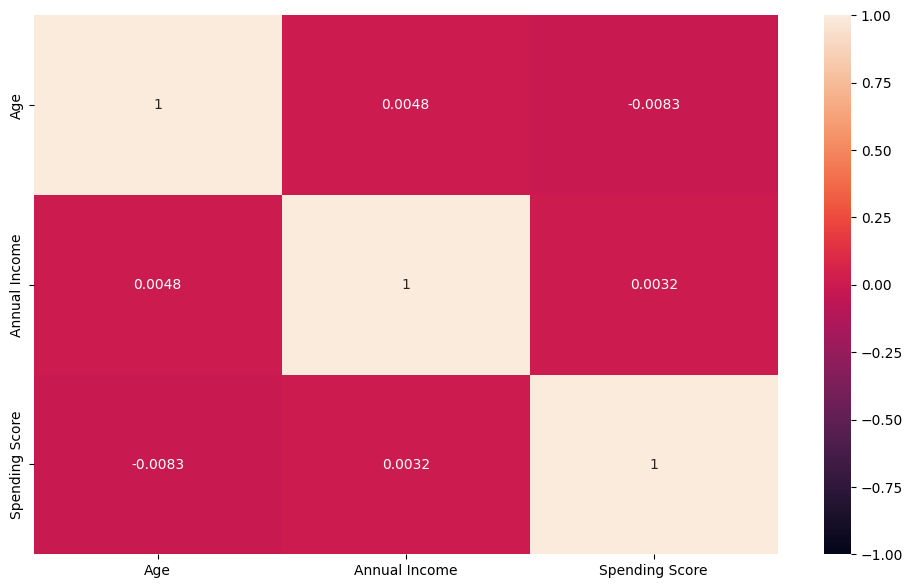

In [25]:
plt.figure(figsize=(12, 7))
numerical_data = data.select_dtypes(include=['number']) # Seleccionar sólo columnas numéricas
sns.heatmap(numerical_data.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

Very weak correlation between the numeric variables.

### **Age**

In [26]:
# Age statistics grouped data by Gender
pd.options.display.max_columns = None
data.groupby(['Gender'])['Age'].describe()

<ipython-input-26-b17337adf270>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['Gender'])['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,7484.0,54.148316,21.092725,18.0,36.0,54.0,72.0,90.0
Male,7595.0,54.234233,21.146573,18.0,36.0,54.0,73.0,90.0


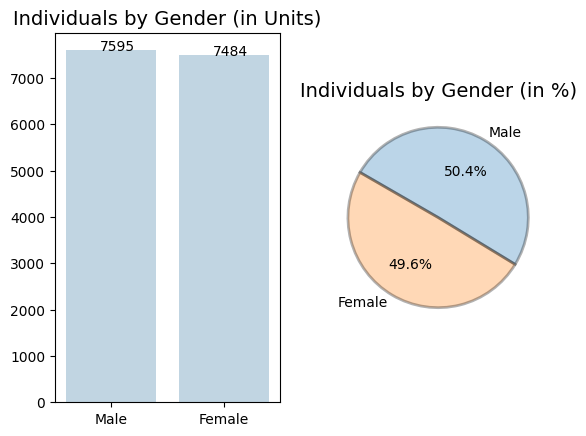

In [27]:
# Total of buyers by gender
plt.subplot(1,2,1)
plt.title('Individuals by Gender (in Units)', fontsize=14)
ax = sns.countplot(x="Gender", data=data, order=data['Gender'].value_counts().index, alpha=0.3)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+2))
plt.xlabel(None)
plt.ylabel(None)

# Total buyers by gender in Percentage
plt.subplot(1,2,2)
plt.title('Individuals by Gender (in %)',fontsize=14)
data['Gender'].value_counts().plot(kind='pie', legend=None, ylabel='', counterclock=False, startangle=150, wedgeprops={'alpha':0.3, 'edgecolor' : 'black','linewidth': 2, 'antialiased': True}, autopct='%1.1f%%')

plt.show()

We a see a higher amount of male registers.

In [28]:
# Function to generate age groups
def age_group_function(data):

    if (data['Age'] >= 100):                               # Group older than 100 years old
        return '[100<]'

    elif (data['Age'] < 100) and (data['Age'] >= 90):       # Group between 90 and 100 years old
        return '[90, 100]'

    elif (data['Age'] < 90) and (data['Age'] >= 80):        # Group between 80 y 90 years old
        return '[80, 90]'

    elif (data['Age'] < 80) and (data['Age'] >= 70):        # Group between 70 y 80 years old
        return '[70, 80]'

    elif (data['Age'] <= 70) and (data['Age'] >= 60):       # Group between 60 y 70 years old
        return '[60, 70]'

    elif (data['Age'] <= 60) and (data['Age'] >= 50):       # Group between 50 y 60 years old
        return '[50, 60]'

    elif (data['Age'] <= 50) and (data['Age'] >= 40):       # Group between 40 y 50 years old
        return '[40, 50]'

    elif (data['Age'] <= 40) and (data['Age'] >= 30):       # Group between 30 y 40 years old
        return '[30, 40]'

    elif (data['Age'] <= 30) and (data['Age'] >= 20):       # Group between 20 y 30 years old
        return '[20, 30]'

    elif (data['Age'] <= 20) and (data['Age'] >= 10):       # Group between 10 y 20 years old
        return '[10, 20]'

    elif (data['Age'] < 10):                              # Group younger than 10 years old
        return '[0-10]'

# Applying the function to generate column age_group
data['age_group'] = data.apply(age_group_function, axis = 1)

In [29]:
# Count the frequency of each age group for each gender
age_group_counts = data.groupby(['age_group', 'Gender'])['Gender'].count().unstack()
age_group_counts

<ipython-input-29-656f78d97159>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = data.groupby(['age_group', 'Gender'])['Gender'].count().unstack()


Gender,Female,Male
age_group,,
"[10, 20]",198,206
"[20, 30]",1007,1022
"[30, 40]",1045,1053
"[40, 50]",991,1012
"[50, 60]",1059,1046
"[60, 70]",1048,1013
"[70, 80]",989,1072
"[80, 90]",1042,1055
"[90, 100]",105,116


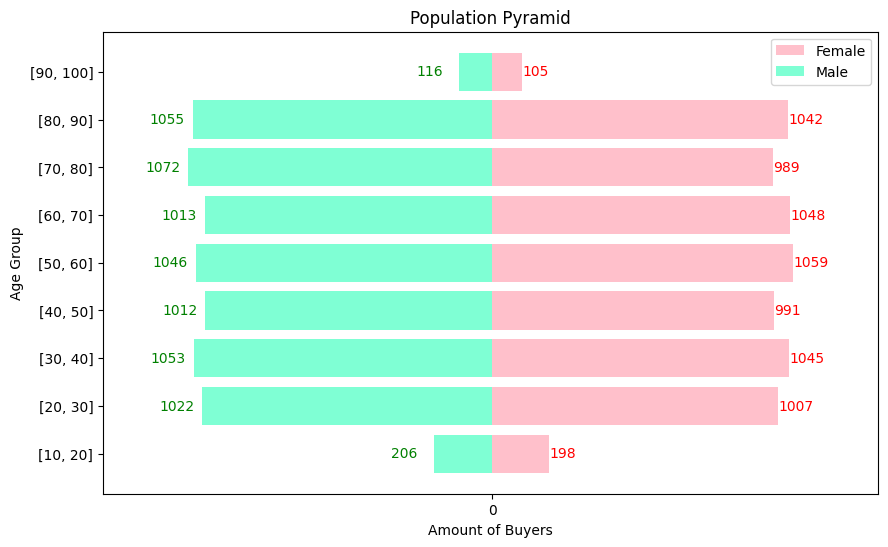

In [31]:
# Create Population Pyramid
fig, ax = plt.subplots(figsize=(10, 6))

# Counts of females and males
female_counts = age_group_counts['Female'].values
male_counts = age_group_counts['Male'].values

# Graphs
ax.barh(age_group_counts.index, female_counts, color='pink', label='Female')
ax.barh(age_group_counts.index, -male_counts, color='aquamarine', label='Male')

# Add values to bars
for i, count in enumerate(female_counts):
    ax.text(count + 2, i, str(count), color='red', va='center', fontsize=10)

for i, count in enumerate(male_counts):
    ax.text(-count - 152, i, str(count), color='green', va='center', fontsize=10)

# Axis limits
ax.set_xlim(-max(male_counts)-300, max(female_counts)+300)

# Only write value 0 on x-ticks
ax.set_xticks([0])

# Labels and Title
ax.set_xlabel('Amount of Buyers')
ax.set_ylabel('Age Group')
ax.set_title('Population Pyramid')
ax.legend()

plt.show()

### **Annual Income**

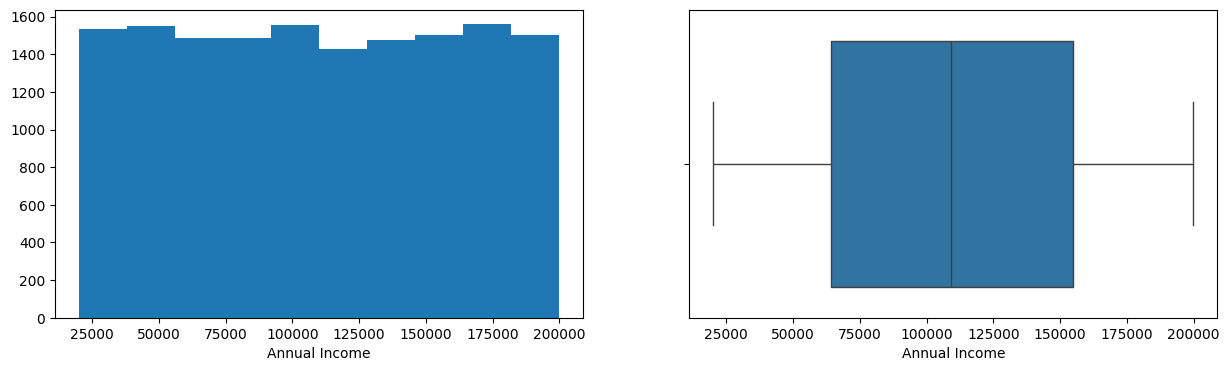

In [33]:
plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
data['Annual Income'].hist(grid=False)
plt.xlabel('Annual Income')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['Annual Income'])
plt.show()

In [32]:
data.groupby(['Gender'])['Annual Income'].describe()

<ipython-input-32-43c079e3a4cc>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['Gender'])['Annual Income'].describe()


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,7484.0,109902.799572,52414.372856,20022.0,63806.25,109707.5,155500.75,199963.0
Male,7595.0,109585.298749,52089.349436,20026.0,64337.50,108664.0,154467.00,199974.0


<ipython-input-34-4654005210ce>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x='Gender', y='Annual Income', data=data, palette={'Male': 'lightblue', 'Female': 'lightpink'})


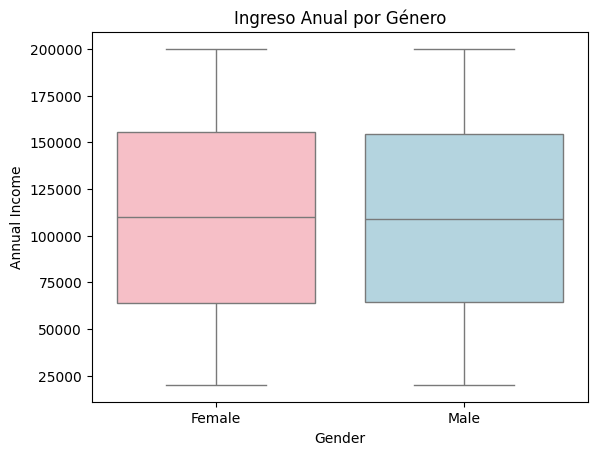

In [34]:
boxplot = sns.boxplot(x='Gender', y='Annual Income', data=data, palette={'Male': 'lightblue', 'Female': 'lightpink'})
plt.title('Ingreso Anual por Género')
plt.ylabel('Annual Income')
plt.show()

### **Spending Score**

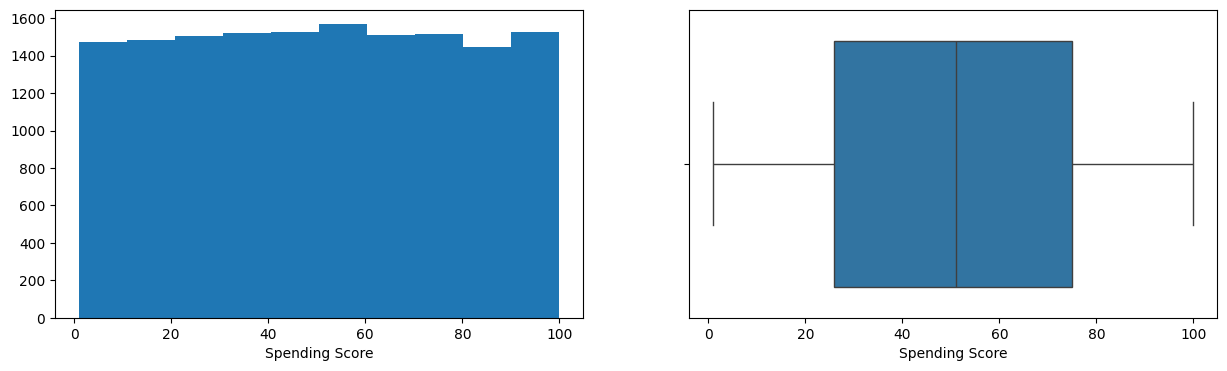

In [35]:
plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
data['Spending Score'].hist(grid=False)
plt.xlabel('Spending Score')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['Spending Score'])
plt.show()

In [36]:
data.groupby(['Gender'])['Spending Score'].describe()

<ipython-input-36-415807608c81>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['Gender'])['Spending Score'].describe()


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,7484.0,50.397648,28.809411,1.0,26.0,51.0,75.0,100.0
Male,7595.0,50.782752,28.646128,1.0,26.0,51.0,76.0,100.0


<ipython-input-37-a70c0ec2a248>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x='Gender', y='Spending Score', data=data, palette={'Male': 'lightblue', 'Female': 'lightpink'})


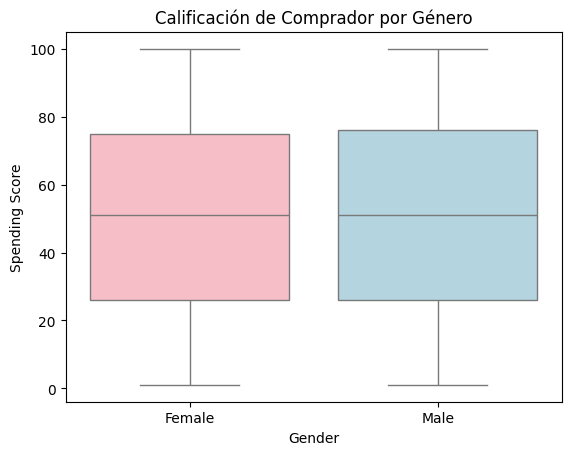

In [37]:
boxplot = sns.boxplot(x='Gender', y='Spending Score', data=data, palette={'Male': 'lightblue', 'Female': 'lightpink'})
plt.title('Calificación de Comprador por Género')
plt.ylabel('Spending Score')
plt.show()

In [38]:
annual_income_by_age_group = data.groupby(['age_group','Gender'])['Annual Income'].sum() / data.groupby(['age_group','Gender'])['Annual Income'].count() * 100.0
annual_income_by_age_group

<ipython-input-38-543789a5f367>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  annual_income_by_age_group = data.groupby(['age_group','Gender'])['Annual Income'].sum() / data.groupby(['age_group','Gender'])['Annual Income'].count() * 100.0
<ipython-input-38-543789a5f367>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  annual_income_by_age_group = data.groupby(['age_group','Gender'])['Annual Income'].sum() / data.groupby(['age_group','Gender'])['Annual Income'].count() * 100.0


age_group  Gender
[10, 20]   Female    1.157916e+07
           Male      1.095779e+07
[20, 30]   Female    1.103885e+07
           Male      1.107043e+07
[30, 40]   Female    1.098853e+07
           Male      1.066499e+07
[40, 50]   Female    1.076547e+07
           Male      1.094406e+07
[50, 60]   Female    1.102750e+07
           Male      1.101215e+07
[60, 70]   Female    1.100401e+07
           Male      1.091068e+07
[70, 80]   Female    1.100108e+07
           Male      1.081464e+07
[80, 90]   Female    1.098654e+07
           Male      1.116576e+07
[90, 100]  Female    1.097614e+07
           Male      1.214419e+07
Name: Annual Income, dtype: float64

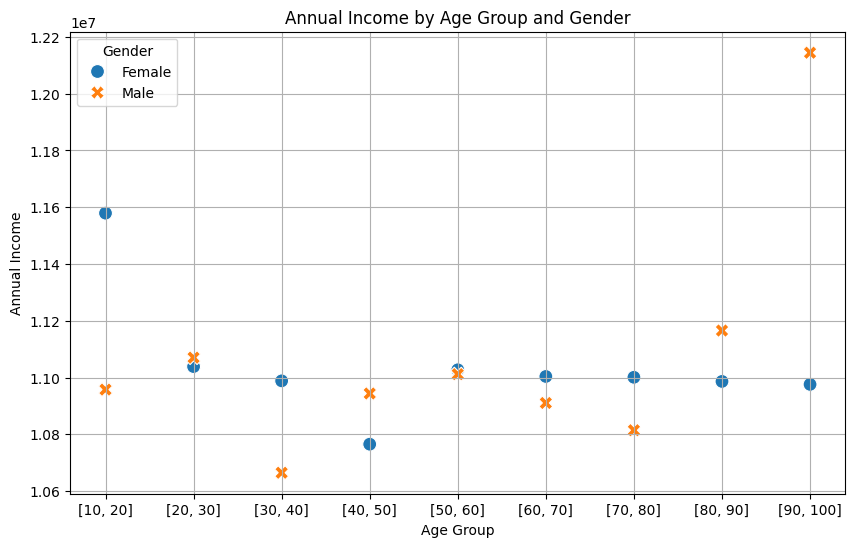

In [39]:
# Create the point graph
plt.figure(figsize=(10, 6))
annual_income_df = annual_income_by_age_group.reset_index()
sns.scatterplot(data=annual_income_df, x='age_group', y='Annual Income', hue='Gender', style='Gender', s=100)
plt.title('Annual Income by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Annual Income')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

In [40]:
spending_score_by_age_group = data.groupby(['age_group','Gender'])['Spending Score'].mean()
spending_score_by_age_group

<ipython-input-40-b646948f1803>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_score_by_age_group = data.groupby(['age_group','Gender'])['Spending Score'].mean()


age_group  Gender
[10, 20]   Female    53.282828
           Male      50.849515
[20, 30]   Female    49.210526
           Male      52.781800
[30, 40]   Female    50.299522
           Male      50.268756
[40, 50]   Female    50.689203
           Male      50.874506
[50, 60]   Female    50.677998
           Male      50.696941
[60, 70]   Female    51.024809
           Male      50.330701
[70, 80]   Female    49.684530
           Male      50.781716
[80, 90]   Female    50.323417
           Male      49.458768
[90, 100]  Female    52.933333
           Male      53.689655
Name: Spending Score, dtype: float64

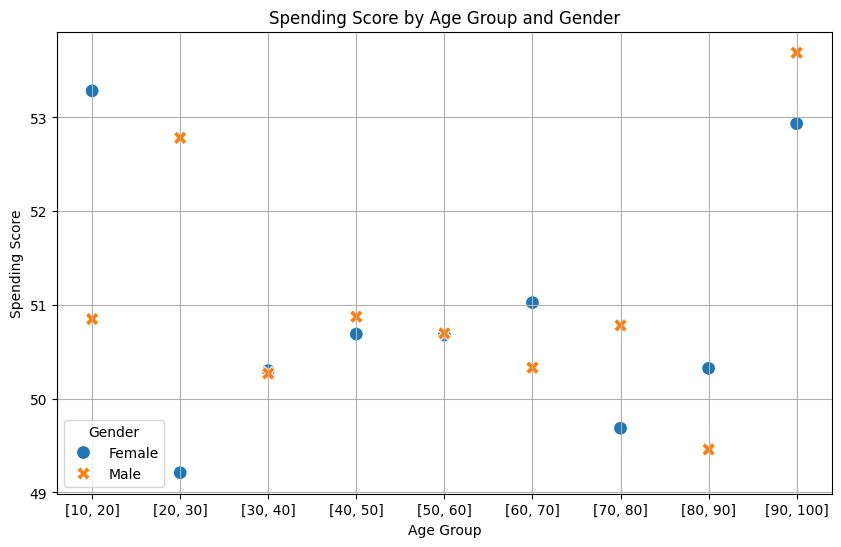

In [41]:
# Create the point graph
plt.figure(figsize=(10, 6))
spending_score_df = spending_score_by_age_group.reset_index()
sns.scatterplot(data=spending_score_df, x='age_group', y='Spending Score', hue='Gender', style='Gender', s=100)
plt.title('Spending Score by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Spending Score')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

# **Kmeans**

In [43]:
# Codify the categorical variable Gender (to convert it into numeric)
data["Gender"] = data["Gender"].cat.codes
data.head()

AttributeError: Can only use .cat accessor with a 'category' dtype

Gender = 0 = Female

Gender = 1 = Male

## **a) Normalization**

In [44]:
numeric_data = data.select_dtypes(include=['number']) # Select only numeric columns
data_norm = (numeric_data - numeric_data.min()) / (numeric_data.max() - numeric_data.min())
data_norm['Gender'] = data['Gender']  # add Gender column back
data_norm.head()

,Age,Gender,Annual Income,Spending Score
0,0.166667,1,0.730511,0.888889
1,0.555556,0,0.917278,0.949495
2,0.611111,0,0.282798,0.757576
3,0.069444,1,0.196930,0.565657
4,0.083333,1,0.743143,0.757576


## **b) Number of Clusters Determination with Elbow Method**

In [45]:
from sklearn.cluster import KMeans

# Crear empty variable to store values of WCSS that are calculating when using the loop
wcss = []

# Loop to create different amount of clusters asigning values to variable i, in a range in 3
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, max_iter=300, random_state=2) # create a kmean model, indicating with i that the amount of clusters will change as i takes the values between 1 and 10, with a maximum of 300 iterations for kmeans
  kmeans.fit(data_norm) # apply the created model to the normalized dataframe
  wcss.append(kmeans.inertia_) # value of WCS corresponding to the model with i clusters and add it to the empty variable

# print on screen the values of WCS generated with the loop
print(f"\n Valores de WCSS para distintas cantidades de clusters: {wcss}")


 Valores de WCSS para distintas cantidades de clusters: [7607.526580767072, 3837.9067136056624, 3344.571522737063, 2866.668778352894, 2584.4527044533743, 2344.980559480392, 2058.954206560021, 1830.4024152228192, 1684.5481354355275, 1534.9488053927585]


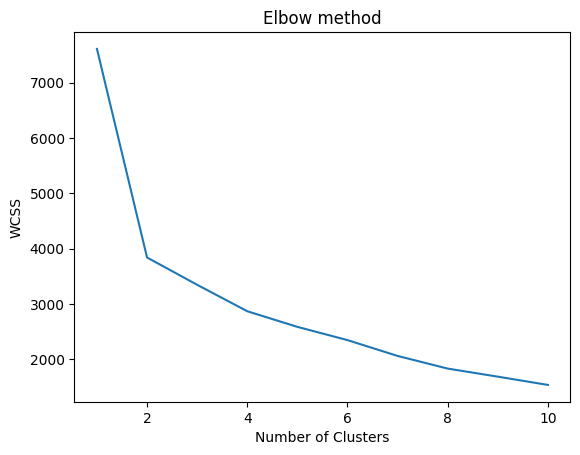

In [47]:
# luego, graficamos los resultados de WCSS para formar el codo de Jambú y tomar una decisión
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS") # indicador de inercia
plt.show()

## **c) KneeLocator**

In [48]:
# Initialize KneeLocator
!pip install kneed
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")

# Print the elbow point
print('KneeLocator es igual a ', kl.elbow)

KneeLocator es igual a  2


## **d) Silhouette Method**

In [49]:
## Método Silhouette
from sklearn.metrics import silhouette_score

silhouette_coef = []

for cluster in range(2,16):
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 1)
    kmeans.fit(data_norm)
    score = silhouette_score(data_norm, kmeans.labels_)
    silhouette_coef.append(score)

silhouette_coef

[np.float64(0.4550756417326347),
 np.float64(0.33788940186449035),
 np.float64(0.3257633150078495),
 np.float64(0.2412741264431378),
 np.float64(0.23819580814676675),
 np.float64(0.24899581987452957),
 np.float64(0.2522059528389659),
 np.float64(0.25853973520971424),
 np.float64(0.2563276095084352),
 np.float64(0.27015480674862535),
 np.float64(0.26980814358207056),
 np.float64(0.2784955706533227),
 np.float64(0.27875085970519087),
 np.float64(0.2796155971792132)]

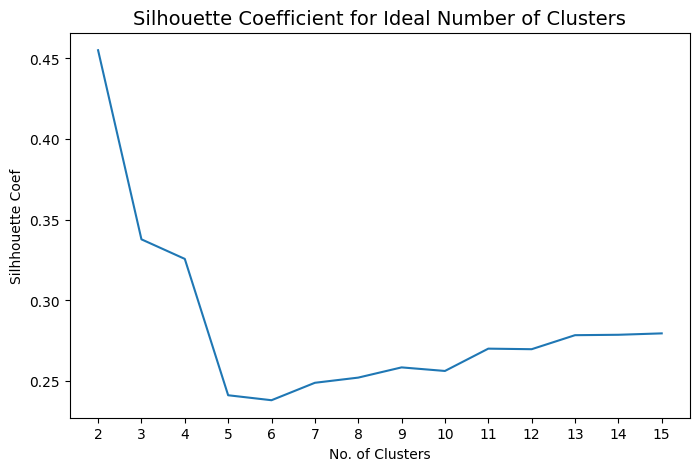

In [50]:
## Silhouette Coefficient Graph

plt.figure(figsize=(8,5))
plt.plot(range(2,16), silhouette_coef)
plt.xticks(range(2,16))
plt.title('Silhouette Coefficient for Ideal Number of Clusters', fontsize=14)
plt.xlabel('No. of Clusters')
plt.ylabel('Silhhouette Coef')
plt.show()

## **KMeans with two clusters and 300 iterations**

In [51]:
# Create the model
clustering = KMeans(n_clusters = 2, max_iter = 300, random_state = 2)

# Apply model to dataframe
clustering.fit(data_norm)

KMeans(n_clusters=2, random_state=2)

In [52]:
# Create new column on the dataframe that indicates to which cluster belong the customer
data["KMeans_Clusters"] = clustering.labels_

# Dataframe with new column
data.head()

,Customer ID,Age,Gender,Annual Income,Spending Score,age_group,KMeans_Clusters
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,1,151479,89,"[30, 40]",1
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,0,185088,95,"[50, 60]",0
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,0,70912,76,"[60, 70]",0
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,1,55460,57,"[20, 30]",1
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,1,153752,76,"[20, 30]",1


In [53]:
# Statistical analysis
pd.set_option('display.max_rows', None)
data.groupby("KMeans_Clusters").describe().T

KMeans_Clusters                   0              1
Age            count    7484.000000    7595.000000
               mean       54.148316      54.234233
               std        21.092725      21.146573
               min        18.000000      18.000000
               25%        36.000000      36.000000
               50%        54.000000      54.000000
               75%        72.000000      73.000000
               max        90.000000      90.000000
Gender         count    7484.000000    7595.000000
               mean        0.000000       1.000000
               std         0.000000       0.000000
               min         0.000000       1.000000
               25%         0.000000       1.000000
               50%         0.000000       1.000000
               75%         0.000000       1.000000
               max         0.000000       1.000000
Annual Income  count    7484.000000    7595.000000
               mean   109902.799572  109585.298749
               std     52414.372856   52089.349436
               min     20022.000000   20026.000000
               25%     63806.250000   64337.500000
               50%    109707.500000  108664.000000
               75%    155500.750000  154467.000000
               max    199963.000000  199974.000000
Spending Score count    7484.000000    7595.000000
               mean       50.397648      50.782752
               std        28.809411      28.646128
               min         1.000000       1.000000
               25%        26.000000      26.000000
               50%        51.000000      51.000000
               75%        75.000000      76.000000
               max       100.000000     100.000000

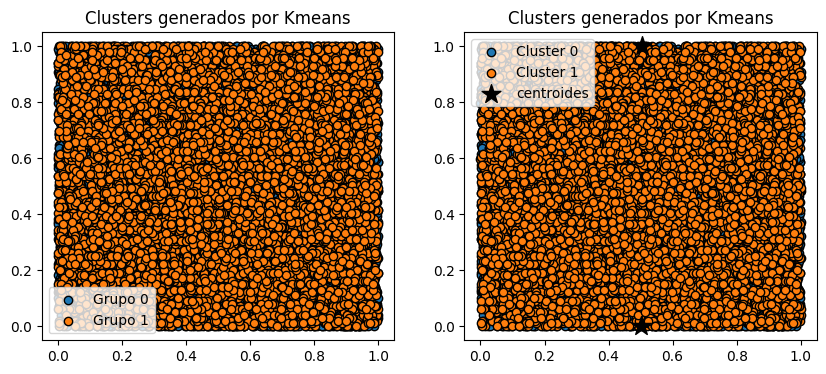

In [54]:
# Graphical representation of original groups versus created clusters
# ==============================================================================
import matplotlib.pyplot as plt  # Import the matplotlib.pyplot module
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Assuming 'KMeans_Clusters' column in 'data' represents original cluster labels
# Replace 'data_norm' with the appropriate DataFrame containing original data if different
# Replace 'Annual Income' and 'Spending Score' with actual column names if different
for i in np.unique(data['KMeans_Clusters']):
    ax[0].scatter(
        x=data_norm[data['KMeans_Clusters'] == i]['Annual Income'],
        y=data_norm[data['KMeans_Clusters'] == i]['Spending Score'],
        c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker='o',
        edgecolor='black',
        label=f"Grupo {i}"
    )

ax[0].set_title('Clusters generados por Kmeans')
ax[0].legend()

# For the second plot, you need to define 'y_predict', 'X_scaled', and 'modelo_kmeans'
# Assuming 'clustering' from previous cell holds the KMeans model
y_predict = clustering.labels_
X_scaled = data_norm[['Annual Income', 'Spending Score']]  # Assuming these are the features used for clustering
modelo_kmeans = clustering  # Assign the KMeans model to 'modelo_kmeans'

for i in np.unique(y_predict):
    ax[1].scatter(
        x=X_scaled[y_predict == i]['Annual Income'],
        y=X_scaled[y_predict == i]['Spending Score'],
        c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker='o',
        edgecolor='black',
        label=f"Cluster {i}"
    )

ax[1].scatter(
    x=modelo_kmeans.cluster_centers_[:, 0],
    y=modelo_kmeans.cluster_centers_[:, 1],
    c='black',
    s=200,
    marker='*',
    label='centroides'
)
ax[1].set_title('Clusters generados por Kmeans')
ax[1].legend()

plt.show()  # Add plt.show() to display the plot

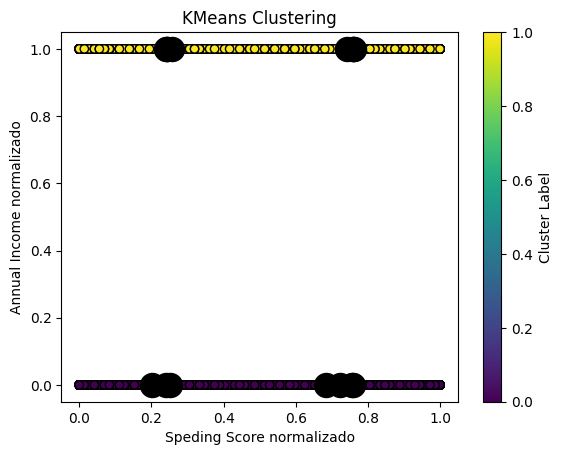

In [55]:
# Clusters Graphs
plt.scatter(data_norm.iloc[:, 0], data_norm.iloc[:, 1], c=clustering.labels_, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Speding Score normalizado')
plt.ylabel('Annual Income normalizado')
plt.colorbar(label='Cluster Label')
plt.show()

In [62]:
# 3D Plot
import plotly.express as px

data_norm['KMeans_Clusters'] = data['KMeans_Clusters']

fig_3d = px.scatter_3d(
    data_norm,
    x='Age',
    y='Annual Income',
    z='Spending Score',
    color='KMeans_Clusters',
    title='Customer Segments - 3D View',
    labels={
        'Age': 'Age',
        'Annual Income': 'Annual Income',
        'Spending Score': 'Spending Score'
    },
    color_continuous_scale='viridis'
)

fig_3d.update_layout(
    scene = dict(
        xaxis_title='Age',
        yaxis_title='Annual Income',
        zaxis_title='Spending Score'
    ),
    title={'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
    height=700,
    width=900
)
fig_3d.show()

# **References**

Mustafa, Z. 2024. Shopping Mall Customer Segmentation Data. https://www.kaggle.com/datasets/zubairmustafa/shopping-mall-customer-segmentation-data?resource=download. Consultado el 22 de marzo de 2025.